In [19]:
import pandas as pd
import shap
import joblib
import numpy as np


In [20]:
import warnings

warnings.filterwarnings("ignore")

In [35]:
df_2 = pd.read_csv("../Data/black_box_3_data.csv")

# Drop the 'Group' column
df_2 = df_2.drop(columns=["Group"])

# Select features and target
X = df_2.drop(columns=["Default (y)", "Pred_default (y_hat)", "PD"])
y = df_2["PD"]

In [36]:
# Load the model
model = joblib.load("../Models/MLP_model_only.pkl")

# Scale X using the scaler from the pipeline
scaler = joblib.load("../Models/MLP_scaler_only.pkl")
X_scaled = scaler.transform(X)

# Create the explainer
explainer = shap.Explainer(model.predict_proba, X_scaled)

# Calculate SHAP values
shap_values = explainer(X_scaled)


PermutationExplainer explainer: 7431it [09:55, 12.24it/s]                          


SHAP values shape: (7430, 15, 2)


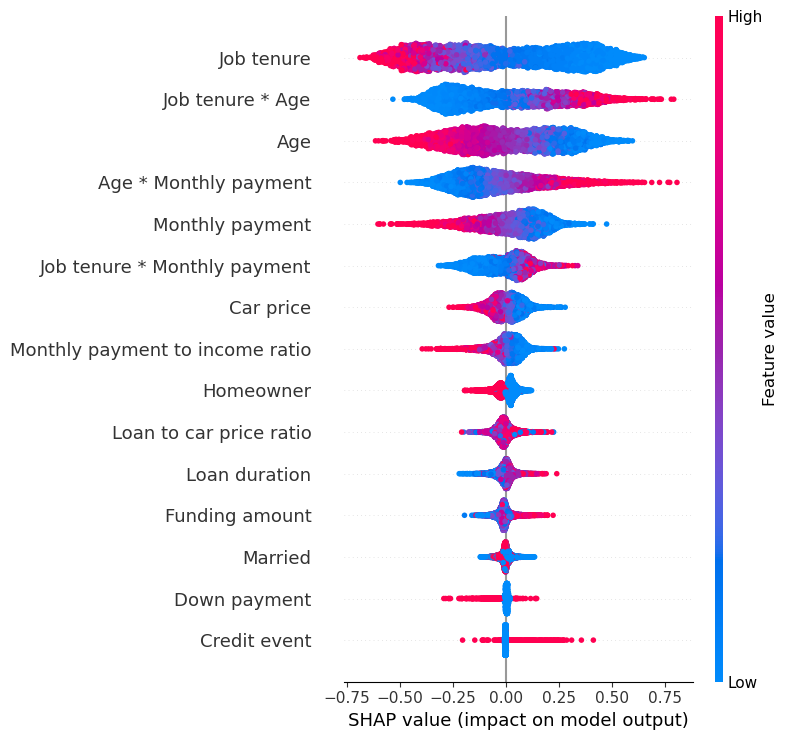

In [37]:
print(f"SHAP values shape: {shap_values.shape}")

# Visualize the SHAP summary plot for the second class (class 1)
shap.summary_plot(shap_values[:, :, 1], X_scaled, feature_names=X.columns)


In [34]:
import matplotlib.pyplot as plt

# Save the SHAP summary plot for the second class (class 1)
shap.summary_plot(shap_values[:, :, 1], X_scaled, feature_names=X.columns, show=False)
plt.savefig("../Plots/shap_summary_plot.png")
plt.close()

# SHAP Summary Plot Interpretation

In the SHAP summary plot above, each dot represents the impact of a feature on the prediction for an individual sample. The plot displays how the feature values affect the model's output, which is a binary classification task (predicting car loan default, where 0 is no default and 1 is default). Let's break down the interpretation:

## 1. X-axis (SHAP Value)
The SHAP value on the x-axis shows how much each feature contributes to increasing or decreasing the probability of car loan default.  
- SHAP values to the left (negative) push the model's prediction towards no default (0), and SHAP values to the right (positive) push the model’s prediction towards default (1).

## 2. Y-axis (Features)
Features are ranked by their overall importance, with the most important features at the top. In this case:
- **Job tenure** is the most important feature affecting the prediction of car loan default.
- **Credit event** is the least important feature in this context.

## 3. Color of Dots (Feature Value)
The color of each dot represents the feature value:
- **Red dots** represent higher values of the feature.
- **Blue dots** represent lower values of the feature.

## 4. Interpretation of Key Features

### Job Tenure:
- **Higher job tenure (red)** reduces the likelihood of default (negative SHAP values).
- **Lower job tenure (blue)** increases the likelihood of default (positive SHAP values).
- This suggests that people with longer job tenure are less likely to default, which aligns with the idea that job stability can indicate financial stability.

### Job Tenure * Age (Interaction Term):
- **Older individuals with longer job tenure (red)** tend to have a lower chance of default.
- **Younger individuals with shorter job tenure (blue)** are more likely to default.

### Age:
- **Younger borrowers (blue)** are associated with a higher likelihood of default (positive SHAP values).
- **Older borrowers (red)** tend to have a lower chance of default.

### Age * Monthly Payment (Interaction Term):
- **High monthly payments for younger individuals (blue)** increase the likelihood of default.
- **Low monthly payments for older individuals (red)** decrease the likelihood of default.

### Monthly Payment:
- **Higher monthly payments (red)** increase the likelihood of default.
- **Lower payments (blue)** reduce the likelihood of default.

### Job Tenure * Monthly Payment (Interaction Term):
- **Low job tenure combined with high monthly payments (blue)** increases the likelihood of default.

### Car Price:
- **Higher car prices (red)** slightly increase the chance of default.
- **Lower car prices (blue)** are associated with a reduced likelihood of default.

### Monthly Payment to Income Ratio:
- Borrowers with a **high monthly payment to income ratio (red)** are more likely to default, while those with a **low ratio (blue)** are less likely to default.
- This makes sense because higher ratios mean the monthly payments take up a larger portion of their income.

### Homeowner:
- **Non-homeowners (blue)** are slightly more likely to default.

### Loan to Car Price Ratio:
- Borrowers with a **higher loan-to-car price ratio (red)** are more likely to default.
- This suggests that borrowers who finance a larger portion of the car’s value are at a greater risk of default.

### Loan Duration:
- **Longer loan durations (red)** slightly increase the likelihood of default, while shorter loans (blue) reduce it.

### Funding Amount:
- Borrowers with **higher funding amounts (red)** have a small increase in default likelihood.

### Married:
- **Married borrowers (blue)** are less likely to default, while those who are **not married (red)** have a higher likelihood of default.

### Down Payment:
- Borrowers with **higher down payments (red)** have a lower likelihood of default.
- **Lower down payments (blue)** increase the risk of default, which makes sense because a higher down payment reduces the overall loan amount.

### Credit Event:
- **A credit event (red)** is a significant risk factor, strongly increasing the likelihood of default.

## Conclusion
The SHAP plot provides clear insights into the most important features driving the predictions in the car loan default model. 
- **Job tenure**, **age**, **monthly payment**, and **monthly payment to income ratio** are key factors, with lower job tenure, younger age, higher monthly payments, and a higher payment-to-income ratio associated with a higher risk of default.
- Conversely, factors like being **married**, having **long job tenure**, and making **higher down payments** reduce the likelihood of default.


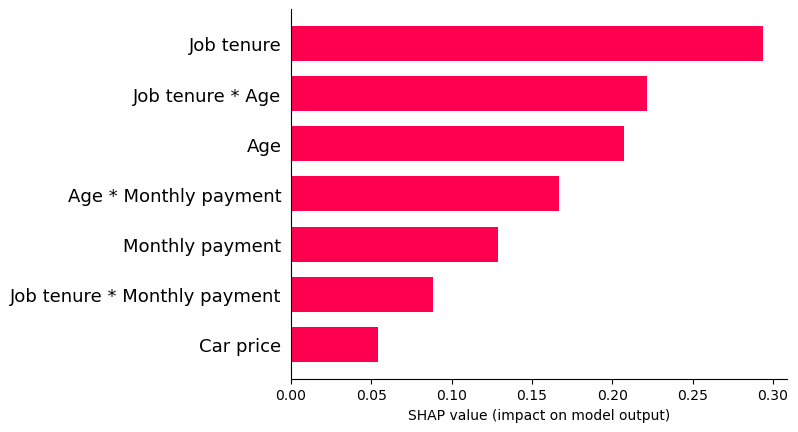

In [41]:
# Extract the SHAP values for the positive class (class 1)
shap_values_class_1 = shap_values.values[:, :, 1]

# Aggregate SHAP values by taking the mean of the absolute values for each feature
mean_abs_shap_values = np.mean(np.abs(shap_values_class_1), axis=0)

# Generate the SHAP bar plot
shap.bar_plot(mean_abs_shap_values, feature_names=X.columns)

# Save the plot
plt.savefig("../Plots/shap_bar_plot.png")
plt.close()


In [43]:
shap_values_df = pd.DataFrame(shap_values_class_1, columns=X.columns)

In [44]:
shap_values_df

,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Monthly payment to income ratio,Loan to car price ratio,Job tenure * Age,Job tenure * Monthly payment,Age * Monthly payment
0,-0.539595,-0.170297,0.059023,-0.000398,0.002213,-0.022840,0.118681,0.000180,-0.030961,-0.017684,-0.026560,-0.025472,0.421579,0.092192,-0.140615
1,0.056145,0.307936,-0.004354,0.000754,0.007418,0.053604,0.096011,0.000076,0.048990,0.047627,0.066485,0.002049,-0.110801,0.042286,-0.194738
2,-0.402637,0.111335,-0.028684,-0.059984,0.004477,0.032416,0.021407,0.000002,0.021515,0.020485,0.047509,-0.033002,0.119449,0.073370,-0.155368
3,-0.482347,0.119662,-0.057641,-0.029367,0.003595,-0.000231,-0.034998,-0.000884,-0.004546,-0.040873,0.085726,0.013294,0.086854,0.103904,-0.042700
4,0.374670,-0.269600,0.046648,-0.072016,0.008741,-0.002713,-0.080249,-0.002142,-0.017798,0.025579,-0.075524,-0.028226,-0.229667,-0.040633,0.218883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7425,-0.130093,0.222423,0.209567,0.022383,0.009256,0.020528,0.113199,0.126689,-0.012825,0.071124,-0.009652,0.013746,-0.010968,0.127035,-0.063904
7426,0.265117,0.236234,-0.156927,0.008306,0.008652,-0.005963,0.037872,-0.005280,0.011612,0.020801,0.070431,-0.102364,-0.281893,-0.163317,-0.219721
7427,0.097691,0.321678,-0.067873,-0.036595,0.002252,-0.108575,-0.313404,-0.003173,0.007156,0.028020,0.015955,0.016385,-0.240462,0.003377,0.009017
7428,-0.135260,0.207384,0.013957,-0.014507,0.008923,0.013554,0.062180,-0.000227,0.049962,-0.057660,0.034981,-0.041757,-0.040822,0.039988,-0.202447


In [45]:
shap_values_df.to_csv("../Data/shap_values.csv", index=False)

In [8]:
import pandas as pd
import shap
import matplotlib.pyplot as plt

In [9]:
shap_values_df = pd.read_csv("../Data/shap_values.csv")

c:\Users\ameya\.conda\envs\fairness\Lib\site-packages\shap\plots\_bar.py:397: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pos, shap_values[feature_inds],
c:\Users\ameya\.conda\envs\fairness\Lib\site-packages\shap\plots\_bar.py:399: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color=[colors.red_rgb if shap_values[feature_inds[i]] > 0 else colors.blue_rgb for i in range(len(y_pos))]


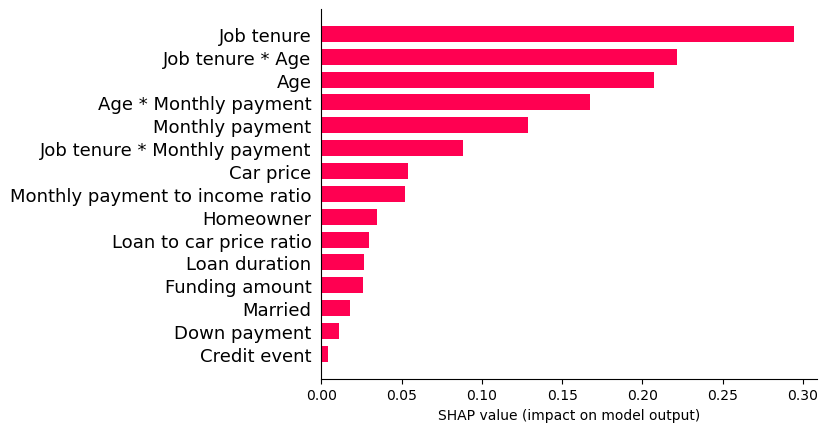

In [13]:
shap_values_class_1 = shap_values_df.values

# Aggregate SHAP values by taking the mean of the absolute values for each feature
mean_abs_shap_values = shap_values_df.abs().mean()

# Generate the SHAP bar plot
# Set max_display to a large number to show all features
shap.bar_plot(
    mean_abs_shap_values,
    feature_names=shap_values_df.columns,
    max_display=len(shap_values_df.columns),
)

plt.tight_layout()
# Save the plot
plt.savefig("../Plots/shap_bar_plot.png")
plt.close()